In [1]:
import pandas as pd
import os
import pickle
from lrs import longestRepeatedSublist, count_subls
from mrs import find_most_occuring_substring
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandarallel import pandarallel
import multiprocessing
pandarallel.initialize(progress_bar=True, nb_workers=multiprocessing.cpu_count())

INFO: Pandarallel will run on 40 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [2]:
print('Number of CPUs:', multiprocessing.cpu_count())

Number of CPUs: 40


In [3]:
files = os.listdir('../data')
# choose files without 'lrs' or 'mrs' in the name
files = [file for file in files if 'lrs' not in file and 'mrs' not in file]
files

['pythia-70m.pkl',
 'pythia-160m.pkl',
 'pythia-410m.pkl',
 'pythia-1b.pkl',
 'pythia-1.4b.pkl',
 'pythia-2.8b.pkl',
 'pythia-6.9b.pkl',
 'pythia-70m-deduped.pkl',
 'pythia-160m-deduped.pkl',
 'pythia-410m-deduped.pkl',
 'pythia-1b-deduped.pkl',
 'pythia-1.4b-deduped.pkl',
 'pythia-2.8b-deduped.pkl',
 'pythia-6.9b-deduped.pkl']

In [4]:
def get_df_with_lrs(file):
    df = pickle.load(open('../data/' + file, 'rb'))
    df['token_len'] = df['tokens'].parallel_apply(len)
    df['lrs'] = df['tokens'].parallel_apply(longestRepeatedSublist)
    df['lrs_occurence_count'] = df.parallel_apply(lambda x: count_subls(x['tokens'], x['lrs']), axis=1)
    df['lrs_len'] = df['lrs'].parallel_apply(len)
    df['lrs_ratio'] = df['lrs_len'] * df['lrs_occurence_count'] / df['token_len']
    # save the df as a pickle file
    pickle.dump(df, open('../data/' + file + '_with_lrs', 'wb'))
    return df

In [5]:
def load_df_with_lrs(file):
    return pickle.load(open('../data/' + file + '_with_lrs', 'rb'))

In [6]:
def preprocess_tokens(toks):
    str_arr = toks.astype(str)
    str_lst = ''.join(str_arr)
    str_lst = str_lst.replace(' ', '').replace(',', '')
    return str_lst

In [7]:
def plot_and_save_lrs(df, file):
    plt.figure(figsize=(10, 8))
    sns.distplot(df['lrs_ratio'], kde=False)
    plt.title('Distribution of ratio for ' + file)
    plt.xlabel('Ratio')
    plt.ylabel('Count')
    plt.savefig('../plots/' + file + '_lrs_dist.png')

Skipping pythia-70m.pkl
Skipping pythia-160m.pkl
Skipping pythia-410m.pkl
Skipping pythia-1b.pkl
Skipping pythia-1.4b.pkl
Skipping pythia-2.8b.pkl
Skipping pythia-6.9b.pkl
Skipping pythia-70m-deduped.pkl
Skipping pythia-160m-deduped.pkl
Skipping pythia-410m-deduped.pkl
Skipping pythia-1b-deduped.pkl


/tmp/ipykernel_1761376/2002449074.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['lrs_ratio'], kde=False)


/tmp/ipykernel_1761376/2002449074.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['lrs_ratio'], kde=False)


/tmp/ipykernel_1761376/2002449074.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['lrs_ratio'], kde=False)


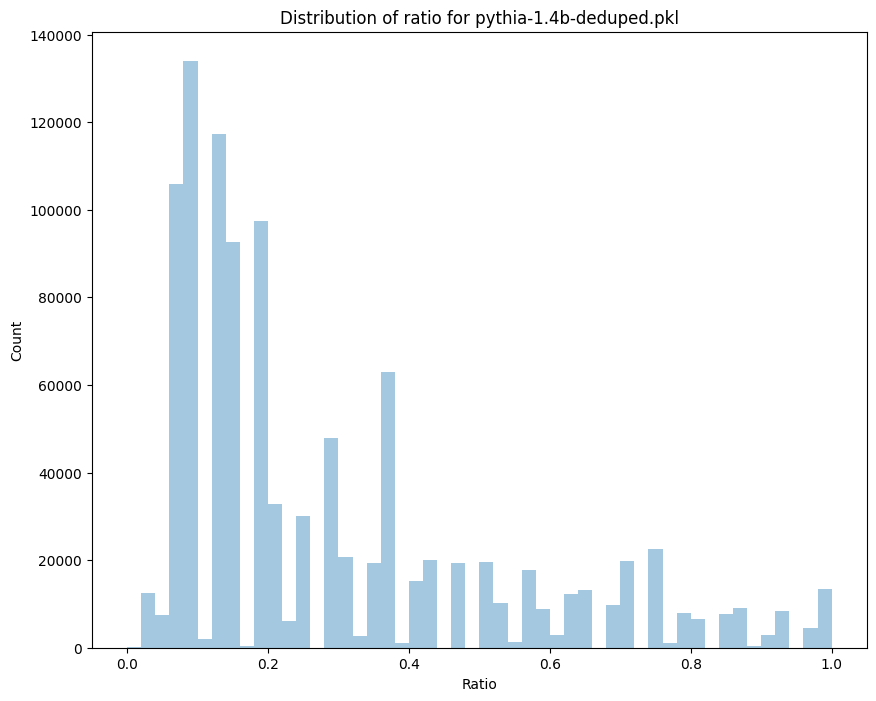

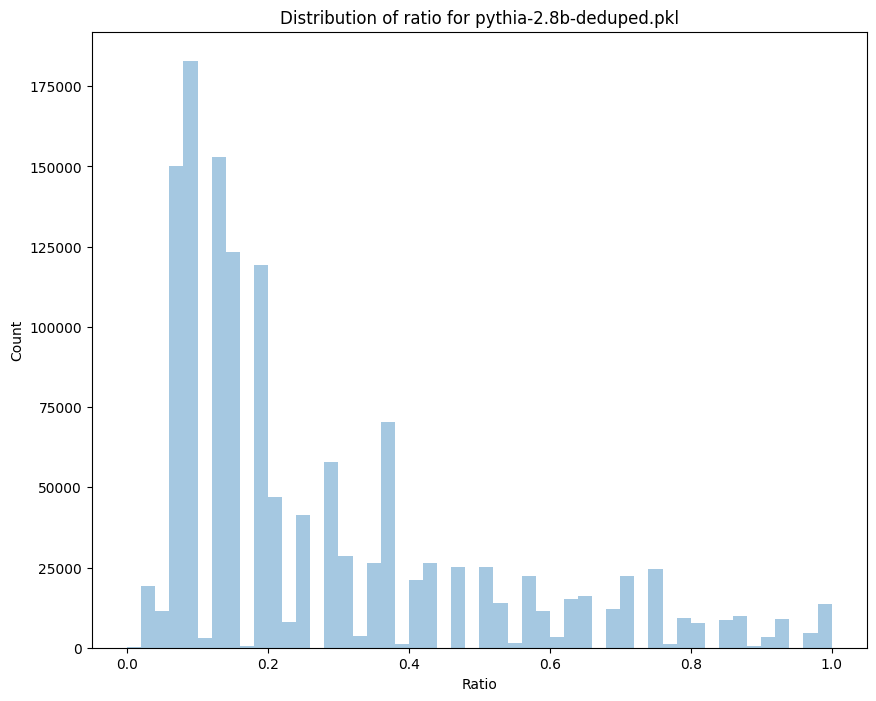

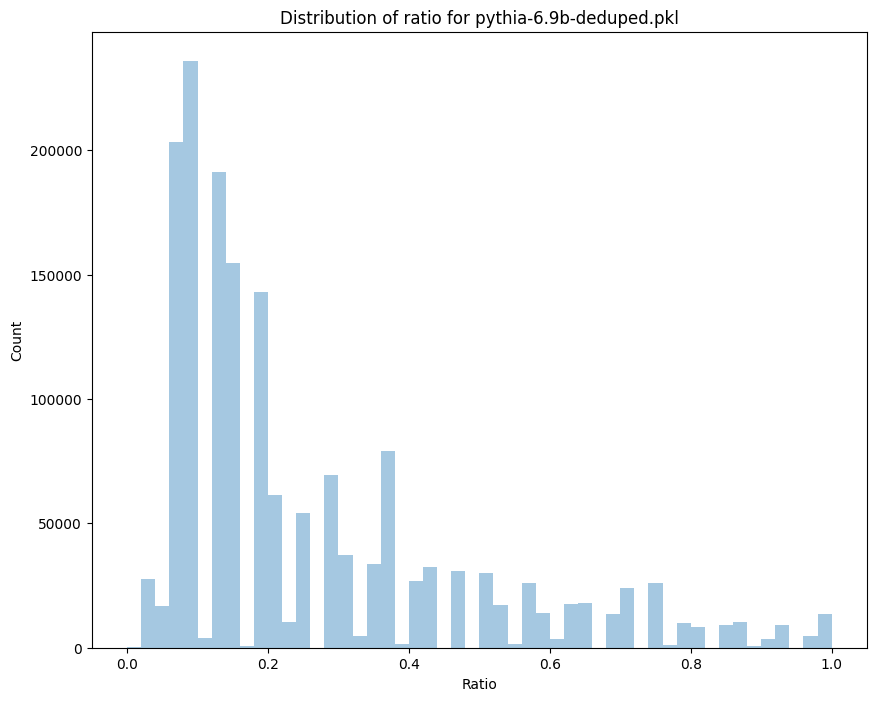

In [9]:
for file in files:
    if 'deduped' not in file:
        print('Skipping', file)
        continue
    if '70m' in file or '160m' in file or '410m' in file or '1b' in file:
        print('Skipping', file)
        continue
    df = get_df_with_lrs(file)
    plot_and_save_lrs(df, file)

In [10]:
# Stitch together the plots into a pdf
import glob
from fpdf import FPDF
from PIL import Image

pdf = FPDF()
# imagelist is the list with all image filenames
files = glob.glob('../plots/*.png')
# choose files with lrs in the name
files = [file for file in files if 'lrs' in file]
for image in files:
    pdf.add_page()
    pdf.image(image, 0, 0, 210, 297)
pdf.output("../plots/lrs_dists.pdf", "F")

''